In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from analysis import visualize_decision_trees, wl_accuracy, season_record, runs_per_game, test_n
from data_format import create_data

In [2]:
version = 6
df = pd.read_csv(f'../data/baseball/training/game_data_v{version}.csv')

In [3]:
x_train_away, x_test_away, y_train_away, y_test_away = create_data(df, y_col='away_score', split_by='season')
x_train_home, x_test_home, y_train_home, y_test_home = create_data(df, y_col='home_score', split_by='season')

In [4]:
model_away = RandomForestRegressor(n_estimators=3, max_features='sqrt')
model_home = RandomForestRegressor(n_estimators=3, max_features='sqrt')

model_away.fit(x_train_away, y_train_away)
model_home.fit(x_train_home, y_train_home)

pred_away = model_away.predict(x_test_away)
pred_home = model_home.predict(x_test_home)

results = pd.DataFrame({'away_pred': pred_away, 'home_pred': pred_home, 'away_true': y_test_away, 'home_true': y_test_home})
results.describe()

print('RANDOM FOREST REGRESSION MODEL (v2 - with increased variance)')
print(f'Accuracy: {wl_accuracy(results)}%')
print('-' * 30)
season_record(df, results)
print('-' * 30)
runs_per_game(df, results)

RANDOM FOREST REGRESSION MODEL (v2 - with increased variance)
Accuracy: 54.27983539094651%
------------------------------
Season records:
ATL: 124-38	LAD: 116-46	HOU: 109-53	MIN: 107-55	PHI: 106-56	
TOR: 103-59	MIL: 98-64	CHC: 93-69	SEA: 93-69	TB: 91-71	
STL: 88-74	SF: 88-74	NYY: 87-75	SD: 86-76	BAL: 84-78	
CLE: 79-83	TEX: 79-83	AZ: 76-86	NYM: 76-86	LAA: 75-87	
BOS: 74-88	MIA: 73-89	CIN: 63-99	DET: 62-100	KC: 61-101	
CWS: 57-105	PIT: 49-113	OAK: 48-114	WSH: 43-119	COL: 42-120	
------------------------------
Runs scored per game:
LAD: 5.69 (921)	ATL: 5.66 (917)	PHI: 5.22 (846)	STL: 5.05 (818)	HOU: 5.05 (817)	
TB: 4.92 (797)	CHC: 4.89 (793)	MIN: 4.87 (790)	TOR: 4.87 (788)	TEX: 4.84 (784)	
NYM: 4.83 (783)	SD: 4.8 (778)	BOS: 4.76 (771)	MIA: 4.68 (758)	LAA: 4.67 (756)	
CIN: 4.65 (753)	SF: 4.57 (741)	MIL: 4.57 (741)	NYY: 4.56 (739)	AZ: 4.53 (733)	
BAL: 4.48 (725)	KC: 4.45 (721)	CLE: 4.43 (717)	SEA: 4.29 (694)	DET: 4.27 (691)	
CWS: 4.15 (673)	OAK: 4.12 (667)	COL: 3.93 (636)	PIT: 3.76 (610)	WS

By using fewer decision trees, the aggregate records came out to be more realistic - even if it did come at the cost of losing some accuracy. Looking at the histogram below, we can see that this modified version has a mean accuracy of about 53%, which is still better than a random guessing model.

                0
count  100.000000
mean    53.053498
std      1.067029
min     50.905350
25%     52.211934
50%     53.127572
75%     53.796296
max     55.349794


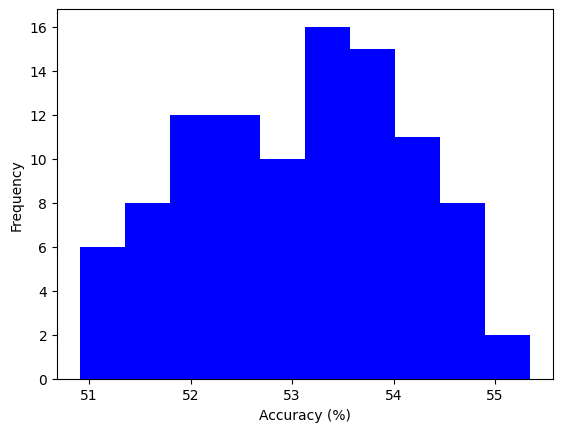

In [5]:
test_n(model_away, model_home, x_train_away, y_train_away, x_train_home, y_train_home, x_test_away, y_test_away, x_test_home, y_test_home, n_iter=100)

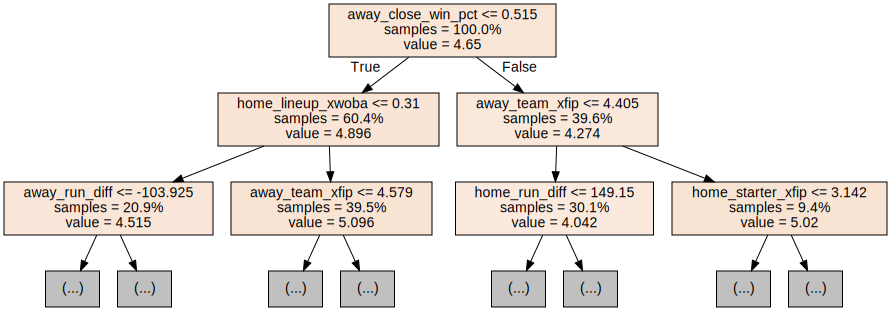

In [6]:
visualize_decision_trees(model_home, x_test_home.columns)